# NBA performance and respective city's economic growth

# Overview

In this report, we observed the relationship between the NBA team's performance and its respective city's economic growth. To do so, we used public datasets and combine them into workable data. With that data, we conducted exploratory data analysis by using various graphs for us to visualize and decide whether there is a relationship. Moreover, we discussed the result by having a statistical analysis using a linear regression model. The result showed that it is hard to determine the relationship between the NBA performance and the respective city's economic growth, and we assume that it is because of too many outliers or other variables that also affect the economic status of the city.

# Names

- Juan Villalobos
- 4 Other Teammates

<a id='research_question'></a>
# Research Question

“Is there a relationship between an NBA team’s performance (win rate, league standings (1st, 2nd…) and economic growth - such as unemployment rate, population growth, and GDP growth - in their respective city?

<a id='background'></a>

## Background & Prior Work

The NBA is the most outstanding sports organization in the world for basketball. We know how Michael Jordan, Kobe Bryant, and LeBron James have significantly impacted our society. Franchise organizations - such as the Golden State Warriors and the Los Angeles Lakers - have contributed to the United States economy. Lately, questions about the year’s NBA champions resulting in their respective city’s rent inflation and other social effects has become a debatable topic. Our background research on the NBA and its economic impact have allowed us to narrow down our interest in the NBA team's performance and the economic growth in their respective city. Our primary purpose is to see whether having an NBA team in a town is a significant benefit or not. Specifically, we will divide economic growth into three subparts: unemployment rate, population growth, and GDP growth.

Gilchrist examines how constructing an NBA arena impacts the host city's economy [^Gilchrist]. He states that construction is not a significant indicator of the economic growth of their respective cities. With the background knowledge and borrowing information from previous literature, he believes the amount of tourism will increase, which will automatically impact the host city's economy. His ideas are closely related to our interest; we would want to see if there is a relationship between the team's performance instead of the construction of the new stadium. However, we can adapt insights into how to treat data like how Gilchrist did and reduce some variances throughout our research.

Additionally, CNN shows the key economic growth indicators: US payrolls, Unemployment rate, GDP and etcetera [^CNN]. Among those indicators, we have decided to see if there is a relationship between the unemployment rate, GDP, and population growth with the NBA team's performances. Coates and Hemphreys introduce how the structure of local professional teams brings hundreds of new jobs; however, they also state that there is no evidence of a positive impact economically from professional sports. Both publications have the same statements that facilities for sports teams do not contribute. However, we hope to see if the team's performance brings other contributions to economic growth.




[^Gilchrist] : Gilchrist, G.(2018). Analysis of the economic impact of constructing a NBA arena on the host City". *CMC Senior Theses*. 
https://scholarship.claremont.edu/cgi/viewcontent.cgi?article=2938&context=cmc_theses

[^CNN] Key Economic Growth Indicators. (n.d.). CNN Business. Retrieved October 23, 2022, from https://edition.cnn.com/business/economic-growth-indicators

[^Coates] : Coates, D., & Humphreys, B. R. (2003). Professional sports facilities, franchises and urban economic development. *Public Finance and Management*, *3*(3), 335-357.
https://core.ac.uk/download/pdf/7068694.pdf

# Hypothesis

We believe that as teams win more games and come out on top of the season, they will become more popular with more live-game attendance which will improve it's respective city's economic. As their performance improves, there will be an increase in hiring, which we assume will improve the unemployment rate. Additionally, we presume the population will grow as more people move into the respective cities to support their teams. Also, the increase in GDP could occur from people being more active in the consumer market related to their supporting teams.

# Dataset(s)

- Dataset Name: NBA (Team_Data)
- Link to the dataset: https://www.basketball-reference.com/leagues/
 - From above link, we have imported each datasets based on the season's year which are going to be total of 20 datasets
- Number of observations: 457
- Description: when the whole data from NBA data is combined we will have the variables of the winrate and the rankings for each teams through seasons from 2001 to 2019

- Dataset Name: Population Growth Rate
- Link to the dataset: https://www.macrotrends.net/
 - From above link, we have imported each years population growth rate datasets based on NBA team's respective cities, which are going to be total of 23 datasets
- Number of observations: 457 
- Description: when the whole data for Population change rate data is combined we will have the variables of population change rate relative to previous year and the total population in by end of that year for each city that is respective to NBA team through seasons from 2001 to 2019.

- Dataset Name: Unemployment Rate
- Link to the dataset: https://www.bls.gov/lau/
 - From above link, we have imported each years unemployment rate datasets based on NBA team's respective cities, which are going to be total of 23 datasets
- Number of observations: 457
- Description: when the whole data from Unemployment Rate data is combined we will have the variables of unemployment rate for each city that is respective to NBA team through seasons from 2001 to 2019

- Dataset Name: GDP Growth Rate
- Link to the dataset: https://www.bea.gov/itable/
 - From above link, we have imported each years GDP Growth rate datasets based on NBA team's respective cities, which are going to be total of 23 datasets
- Number of observations: 457
 - Description: Our dataset contains the GDP data of cities measured across different years. To match the years for NBA season, we includes the years from 2001~2020 and will have variables of GDP rate.

# Setup

Importing Packages that we will be using throughout project

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", 104)
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

# Set plotting size parameters
plt.rcParams['figure.figsize'] = (12, 5)

# Data Cleaning

### Cleaning and Wrangling the Population Data
- We will first import each CSV files for respective cities and  
- Start Wrangling and Cleaning Population Growth Data
 - we created a list of csv file names for population growth
 - and created another list of city's names to assign them later


In [70]:
# Names used for importing CSV files
data_list = ['Atlanta_Pop.csv','Boston_Pop.csv', 'Charlotte_Pop.csv','Chicago_Pop.csv','Cleveland_Pop.csv'
             , 'Dallas_Pop.csv','Denver_Pop.csv', 'Detroit_Pop.csv', 'Houston_Pop.csv', 'Indianapolis_Pop.csv'
            , 'Memphis_Pop.csv','Miami_Pop.csv','Milwaukee_Pop.csv','Minnesota_Pop.csv','Orlando_Pop.csv'
            ,'Philadelphia_Pop.csv','Phoenix_Pop.csv','Portland_Pop.csv','Sacramento_Pop.csv'
             ,'SanAntonio_Pop.csv','SanFrancisco_Pop.csv','Utah_Pop.csv','WashingtonDC_Pop.csv']

# List of city name to assign
city_name = ['Atlanta','Boston', 'Charlotte', 'Chicago', 'Cleveland', 'Dallas', 'Denver', 'Detroit'
          , 'Houston', 'Indiana', 'Memphis', 'Miami', 'Milwaukee', 'Minnesota', 'Orlando'
          ,'Philadelphia', 'Phoenix', 'Portland', 'Sacramento', 'SanAntonio','SanFrancisco', 'Utah', 'Washington']

# To store dataframe into a list
df_pop_list = []*len(city_name)

Going to read the Data and store the each individual data frame (CSV files) into a list called df_pop_list that is made above

In [71]:
# Read Data and store each DataFrame in to a list
for i,index in enumerate(data_list):
    df = pd.read_csv(data_list[i], skiprows=15)
    if len(df_pop_list) < len(data_list):
        df_pop_list.append(df)
        for j in city_name:
            if j in data_list[i]:
                df_pop_list[i].insert(loc = 0, column = 'City Name', value = j)

Now that we have stored in the df_pop_list, we will drop any other years since we only want years from (2000-2020) the reason why we are having 2000-2020 is because each year will have data at the end of the year (E.g., 2000-December) which is close to the end season of NBA (2021-April)

In [72]:
# Dataframes being cleaned using iloc range from 2000~2020
for i in range(len(df_pop_list)):
    df_pop_list[i] = df_pop_list[i].iloc[50:70, ]

Going to combine each datasets into one data sets for population data using concat. Also we will be dropiing Charlotte 02,03 and Memphis 00 because we do not have this data from NBA data

In [73]:
# Combine all population data sets together and reset index
for i in range(len(city_name)):
    df_pop = pd.concat([df_pop_list[i] for i in range(len(city_name))], axis=0)
df_pop = df_pop.rename(columns={'City Name': 'Pop City Name',' Annual Change' : "Pop Change Rate"
                                , 'date': 'Pop Date'})

# drop Charlotte 02-12, 03-12 /Memphis 2000-12-31
df_pop = df_pop[(df_pop['Pop City Name'] != 'Charlotte') | (df_pop['Pop Date'] != '2002-12-31')]
df_pop = df_pop[(df_pop['Pop City Name'] != 'Charlotte') | (df_pop['Pop Date'] != '2003-12-31')]
df_pop = df_pop[(df_pop['Pop City Name'] != 'Memphis') | (df_pop['Pop Date'] != '2000-12-31')].reset_index(drop=True)

df_pop

,Pop City Name,Pop Date,Population,Pop Change Rate
0,Atlanta,2000-12-31,3522000,4.36
1,Atlanta,2001-12-31,3613000,2.58
2,Atlanta,2002-12-31,3706000,2.57
3,Atlanta,2003-12-31,3802000,2.59
4,Atlanta,2004-12-31,3900000,2.58
...,...,...,...,...
452,Washington,2015-12-31,4972000,1.55
453,Washington,2016-12-31,5049000,1.55
454,Washington,2017-12-31,5127000,1.54
455,Washington,2018-12-31,5207000,1.56


### Cleaning and Wrangling the Unemployment Data


Going to create a city's name list to use it to import csv files, and goint to create umeployment data frame list to store each data frame.

In [74]:
# Start Wrangle/Clean Unemployment Rate
# List of all NBA respective cities
city_list = ['Atlanta','Boston', 'Charlotte', 'Chicago', 'Cleveland', 'Dallas', 'Denver', 'Detroit'
          , 'Houston', 'Indiana', 'Memphis', 'Miami', 'Milwaukee', 'Minnesota', 'Orlando'
          ,'Philadelphia', 'Phoenix', 'Portland', 'Sacramento', 'SanAntonio','SanFrancisco', 'Utah', 'Washington']

# Store respective cities DataFrame into a list
df_ur_list = []*len(city_list)

We will first import each CSV files for unemployment rate of each city by using the city_list as the file name with using for loop, After importing the CSV files, we will drop the rows that we do not want which are Charlotte 2003 and 2004 and Memphis 2001

In [75]:
# For loop to wrangle some data including changing name to its respective city
for i in range(len(city_list)):
    df1 = pd.read_csv(city_list[i]+'.csv')
    df1.drop(columns=['Period', 'Year'], axis=1, inplace=True)
    df1.columns = ['Unemp Name', 'Unemp Year', 'Unemp Rate']
    df1 = df1[df1['Unemp Year'].str.contains('Mar')]
    df1['Unemp Name'] = city_list[i]
    df1.drop(index=df1.index[0], axis=0, inplace=True)
    if len(df_ur_list) < len(city_list):
        df_ur_list.append(df1)
df_ur = pd.concat([df_ur_list[i] for i in range(len(df_ur_list))], axis=0)
# Drop Charlotte 2003, 2004, Memphis 2001
df_ur = df_ur[(df_ur['Unemp Name'] != 'Charlotte') | (df_ur['Unemp Year'] != '2003 Mar')]
df_ur = df_ur[(df_ur['Unemp Name'] != 'Charlotte') | (df_ur['Unemp Year'] != '2004 Mar')]
df_ur = df_ur[(df_ur['Unemp Name'] != 'Memphis') | (df_ur['Unemp Year'] != '2001 Mar')].reset_index(drop=True)
df_ur

,Unemp Name,Unemp Year,Unemp Rate
0,Atlanta,2001 Mar,3.2
1,Atlanta,2002 Mar,5.3
2,Atlanta,2003 Mar,5.2
3,Atlanta,2004 Mar,4.7
4,Atlanta,2005 Mar,5.6
...,...,...,...
452,Washington,2016 Mar,3.9
453,Washington,2017 Mar,3.7
454,Washington,2018 Mar,3.4
455,Washington,2019 Mar,3.1


After generating the data frame for unemployment rate for each respective cities above, we have the columns set to be Unemployment Name, Unemployment Year, and Unemp Rate. Later on, we will be using the Unemployment rate to see the relationship between it's NBA team's performance. Unemployment Name and Year will be used when we are going to generate and combine all dataframes into new dataframe which will contain all of the data for our further discussion.

### Cleaning and Wrangling the GDP Data
- We first import each CSV files for respective cities and start wrangling / cleaning data of GDP. We listed all those csv files and sort those data into alphabetic order.

- Since the data format was completely opposite way of layout as the format that we want, so we used the helper funtion to convert the data into the format that we want and also changed the title into the standard format.

- Then we created a datafram of GDP. However, after importing those csv files, we realized that there are 7 extra redundant lines in the csv file that affect the data. Therefore, we used skiplines and skiprows to clean those useless lines.

- Finally we were able to combine those data by merging them and dropped some repeated colums to only keep those datas that we need and make them looks clean and tidy.


In [76]:
# Start wrangling/cleaning for GDP
# List of all GDP csv files
dir_list = ['Atlanta_GDP.csv','Boston_GDP.csv', 'Charlotte_GDP.csv','Chicago_GDP.csv','Cleveland_GDP.csv'
             , 'Dallas_GDP.csv','Denver_GDP.csv', 'Detroit_GDP.csv', 'Houston_GDP.csv', 'Indiana_GDP.csv'
            , 'Memphis_GDP.csv','Miami_GDP.csv','Milwaukee_GDP.csv','Minnesota_GDP.csv','Orlando_GDP.csv'
            ,'Philadelphia_GDP.csv','Phoenix_GDP.csv','Portland_GDP.csv','Sacramento_GDP.csv'
             ,'SanAntonio_GDP.csv','SanFrancisco_GDP.csv','Utah_GDP.csv','Washington_GDP.csv']

# Sort the data into alphabetic order
city_list.sort()
dir_list.sort()

In [77]:
#helper is a function to convert the data into whatever formate we want
def helper(data , cityname):
    COL = data.columns
    ans = pd.DataFrame() #empty dataFrame
    for year in COL:
        if year.isnumeric(): #numeric colums only
            GDP = data[year].values[0]
            tempDf = pd.DataFrame({'GDP City':[cityname] , 'GDP Year':[year] , 'GDP':[GDP]})
            ans = pd.concat([ans , tempDf] ,  ignore_index = True)
    return ans   

In [78]:
#GDP = pd.DataFrame()
GDP = pd.DataFrame()
#df = pd.read_csv ('Sacramento Kings.csv', skiprows = 2, skipfooter = 4, engine = 'python' )
for i in range(len(dir_list)):
    df = pd.read_csv(dir_list[i], skiprows = 3, skipfooter = 4, engine = 'python')
    cityName = (df['GeoName']).values[0]
    cityName = city_list[i]
    curr =  helper(df, cityName)#curr is the 22 rows of the dataframe
    # At this point, the datetype of GDP is not dataframe. So we need to use concate to merge all data
    GDP = pd.concat([GDP , curr] ,ignore_index= True)
# Drop Charlotte 2003, 2004, Memphis 2001
GDP = GDP[(GDP['GDP City'] != 'Charlotte') | (GDP['GDP Year'] != '2003')]
GDP = GDP[(GDP['GDP City'] != 'Charlotte') | (GDP['GDP Year'] != '2004')]
GDP = GDP[(GDP['GDP City'] != 'Memphis') | (GDP['GDP Year'] != '2001')].reset_index(drop=True)
GDP

,GDP City,GDP Year,GDP
0,Atlanta,2001,86.936
1,Atlanta,2002,87.988
2,Atlanta,2003,90.986
3,Atlanta,2004,95.224
4,Atlanta,2005,100.034
...,...,...,...
452,Washington,2016,105.634
453,Washington,2017,107.553
454,Washington,2018,109.848
455,Washington,2019,111.370


After generating the data frame for unemployment rate for each respective cities above, we have the columns set to be GDP City, GDP Year, and GDP. Later on, we will be using the GDP to see the relationship between it's NBA team's performance. GDP city and Year will be used when we are going to generate and combine all dataframes into new dataframe which will contain all of the data for our further discussion.

### Cleaning and Wrangling the NBA performance Data
- We will first import each CSV files for respective cities.
- With the data we have we will be using winrate function to calculate the win rate of each team in each season

In [79]:
# Calculating the winrate based on the records from csv file
def winrate(i):
    wincalc = i.split('-')
    return int(wincalc[0]) / (int(wincalc[0]) + int(wincalc[1]))

In [80]:
# Cleaning and Wrangling data for NBA record
placeholder = pd.DataFrame()
for i in range(0, 20):
    year = str(2000 + i) + "-" + str(2000 + i + 1)
    year_data = str(2000 + i + 1)
    df_nba = pd.read_csv(year + ".csv")
    df_nba["Winrate"] = df_nba.apply(lambda row: winrate(row["Overall"]), axis=1)
    df_nba.rename(columns={"Overall": "Record"})
    df_nba["Year"] = year_data
    placeholder = pd.concat([placeholder, df_nba])
placeholder = placeholder.reset_index(drop=True)
eligible_teams = ["Atlanta Hawks", "Boston Celtics", "Charlotte Hornets", "Charlotte Bobcats", "Chicago Bulls", 
                  "Cleveland Cavaliers", "Dallas Mavericks", "Denver Nuggets", "Detroit Pistons", 
                  "Golden State Warriors", "Houston Rockets", "Indiana Pacers", "Memphis Grizzlies", 
                  "Miami Heat", "Milwaukee Bucks", "Minnesota Timberwolves", "Orlando Magic", 
                  "Philadelphia 76ers", "Phoenix Suns", "Portland Trail Blazers", "Sacramento Kings", 
                  "San Antonio Spurs", "Utah Jazz", "Washington Wizards"]
df_nba = placeholder[placeholder.Team.isin(eligible_teams)]
df_nba = df_nba.reset_index(drop=True)

In [81]:
# Replace name to sort in alphabetical order
df_nba = df_nba.replace('Golden State Warriors', 'SanFrancisco Warriors')
df_nba = df_nba.replace('San Antonio Spurs', 'SanAntonio Spurs')
df_nba = df_nba.sort_values(by = ['Team', 'Year'], ascending = [True, True]).reset_index(drop=True)
df_nba

,Rk,Team,Overall,Winrate,Year
0,25,Atlanta Hawks,25-57,0.304878,2001
1,22,Atlanta Hawks,33-49,0.402439,2002
2,22,Atlanta Hawks,35-47,0.426829,2003
3,25,Atlanta Hawks,28-54,0.341463,2004
4,30,Atlanta Hawks,13-69,0.158537,2005
...,...,...,...,...,...
452,18,Washington Wizards,41-41,0.500000,2016
453,9,Washington Wizards,49-33,0.597561,2017
454,17,Washington Wizards,43-39,0.524390,2018
455,25,Washington Wizards,32-50,0.390244,2019


 - Each dataset is a near-identical list describing the name of the team, the team’s final placement in the standings and the win-loss record of the team for that season. (Due to the website restrictions, the data is formattable into a csv but cannot be downloaded - therefore I pasted each dataset for each season into a notepad document and then saved it as a csv file.)
 - We were able to combine the datasets into one dataframe that represents NBA record, with additional columns describing the season and the win percentage (wins divided by total games).

Now that we have each data frame to be combined into one data frame, we are goint to use merge to combine them into one data frame. 

In [82]:
# Going to combine all data sets into one piece
df = pd.merge(df_nba, df_pop, left_index=True, right_index=True)
df = pd.merge(df, df_ur, left_index=True, right_index=True )
df = pd.merge(df, GDP, left_index=True, right_index=True )
df = df.drop(['Pop Date', 'Unemp Name', 'Unemp Year', 'GDP City', 'GDP Year'], axis=1)
df = df.rename(columns = {'Pop City Name': 'City', ' Population': 'Population'})
df.Winrate=(df.Winrate * 100)
df

,Rk,Team,Overall,Winrate,Year,City,Population,Pop Change Rate,Unemp Rate,GDP
0,25,Atlanta Hawks,25-57,30.487805,2001,Atlanta,3522000,4.36,3.2,86.936
1,22,Atlanta Hawks,33-49,40.243902,2002,Atlanta,3613000,2.58,5.3,87.988
2,22,Atlanta Hawks,35-47,42.682927,2003,Atlanta,3706000,2.57,5.2,90.986
3,25,Atlanta Hawks,28-54,34.146341,2004,Atlanta,3802000,2.59,4.7,95.224
4,30,Atlanta Hawks,13-69,15.853659,2005,Atlanta,3900000,2.58,5.6,100.034
...,...,...,...,...,...,...,...,...,...,...
452,18,Washington Wizards,41-41,50.000000,2016,Washington,4972000,1.55,3.9,105.634
453,9,Washington Wizards,49-33,59.756098,2017,Washington,5049000,1.55,3.7,107.553
454,17,Washington Wizards,43-39,52.439024,2018,Washington,5127000,1.54,3.4,109.848
455,25,Washington Wizards,32-50,39.024390,2019,Washington,5207000,1.56,3.1,111.370


# Data Analysis & Results

#### Now that we have all the data to be used in the Data Frame, we are going to use the data to generate some visualization for our examination.

### Overall Trends in Economic Data
We are first going to look at what each variable's trend is over the year to visualize how the trends look like, and it will also give us idea about whether to consider other third vairables or generate questions about why the graphs look like such.

<AxesSubplot:xlabel='Year', ylabel='Unemp Rate'>

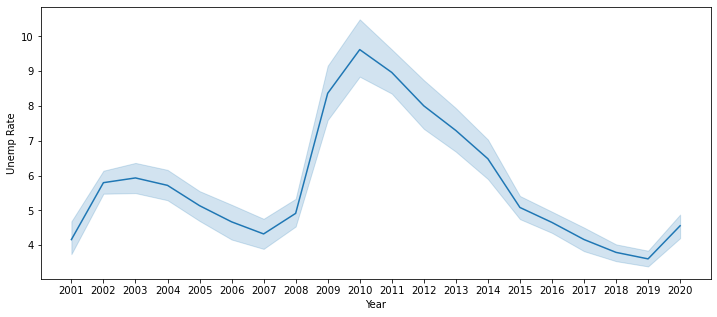

In [83]:
sns.lineplot(data=df, x='Year', y='Unemp Rate')

As the shaded area tells us the maximum for upper boundary and minimum for lower boundary, we see that each city's Unemp Rate trend is similar which tells us that there might be some other varaible that is affecting the whole country's unemployment rate.

<AxesSubplot:xlabel='Year', ylabel='GDP'>

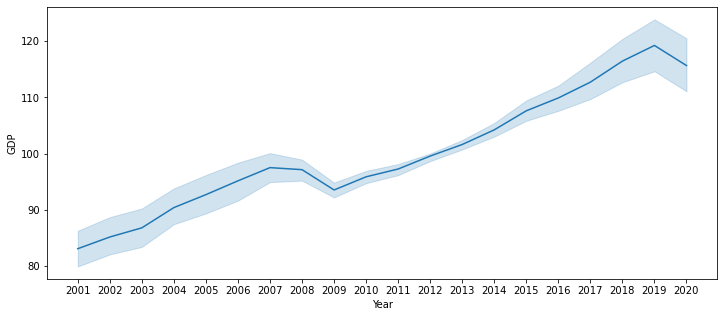

In [84]:
sns.lineplot(data=df, x='Year', y='GDP')

As we expected the GDP grows over time, but we are not yet sure whether NBA performance take into an account of having this trend. To do so we might need more observation.

<AxesSubplot:xlabel='Year', ylabel='Pop Change Rate'>

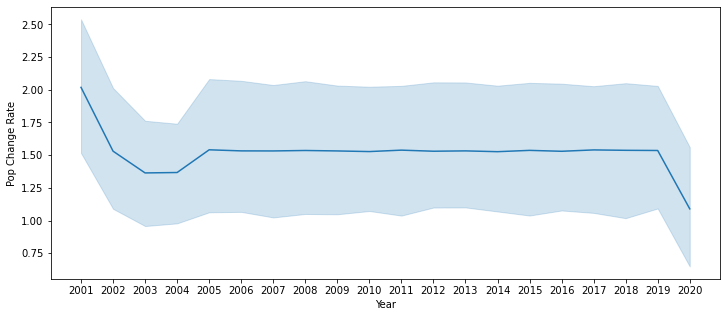

In [85]:
sns.lineplot(data=df, x='Year', y='Pop Change Rate')

The population change rate does seem little weird where the change seems steady through out years except some decrese in 2001 and slight increase in 2004 and decrease again in 2020. All the cities seem to follow the trend here as well. For further discussion, we need to do some statistical testing to find significance of the relationships 

Here are the distribution plot for another visual reference.

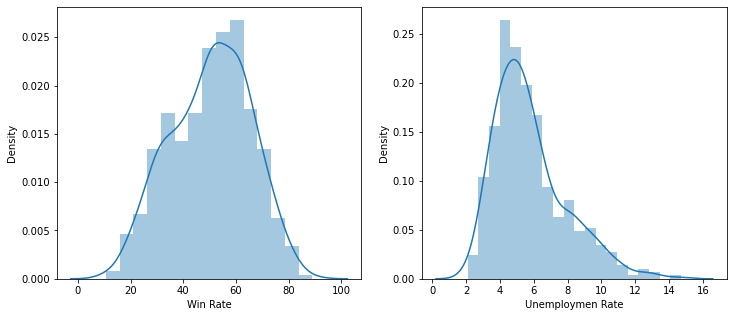

In [86]:
plt.subplot(1, 2, 1)
sns.distplot(df['Winrate'])
plt.xlabel('Win Rate')

plt.subplot(1, 2, 2)
sns.distplot(df['Unemp Rate'])
plt.xlabel('Unemploymen Rate');

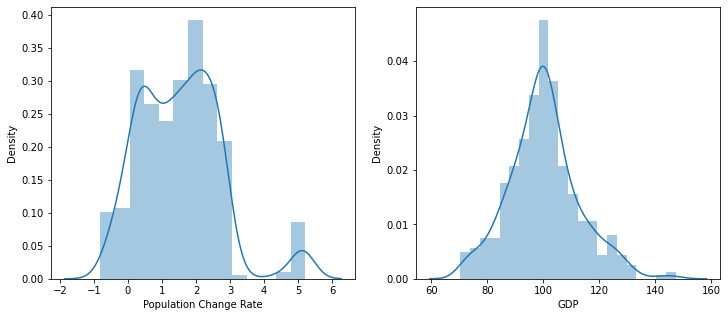

In [87]:
plt.subplot(1, 2, 1)
sns.distplot(df['Pop Change Rate'])
plt.xlabel('Population Change Rate');

plt.subplot(1, 2, 2)
sns.distplot(df['GDP'])
plt.xlabel('GDP');

Except the Population Change Rate, every other variables seems normal. 
Now that we know population Change Rate is bimodal and right skewed, we might have to be more careful with the population change rate when doing statistical tests.

### Comparing Atlanta's performance and  it's Economic Data
Now that we have seen some trends for economic data (Unemployment rate, GDP, and Population), Lets break down by NBA teams and see if can capture out some relationships visually.
- First, we are going to see one of the city (Atlanta) and its economic data

<AxesSubplot:xlabel='Year', ylabel='Winrate'>

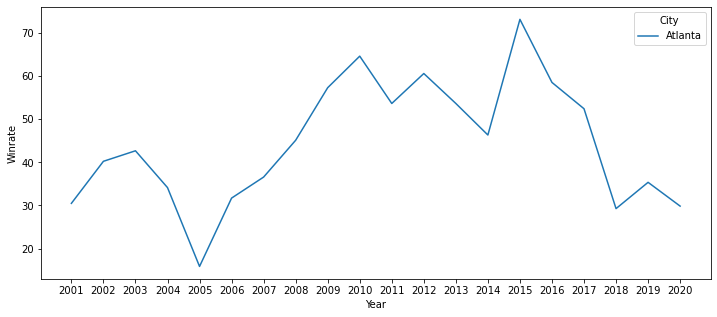

In [88]:
sns.lineplot(data=df[(df['City']=='Atlanta')], x='Year', y='Winrate', hue='City')

The Above graph shows the overall trand of Win Rate for Atlanta Hawks

<AxesSubplot:xlabel='Year', ylabel='GDP'>

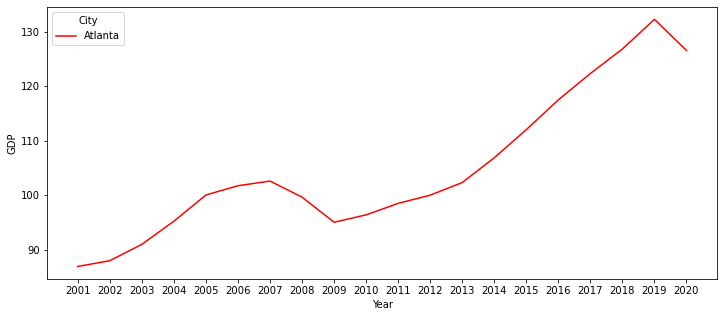

In [89]:
sns.lineplot(data=df[(df['City']=='Atlanta')], x='Year', y='GDP', hue='City', palette = ['r'])

The Above graph shows overall trend of GDP for Atlanta

<AxesSubplot:xlabel='Year', ylabel='Unemp Rate'>

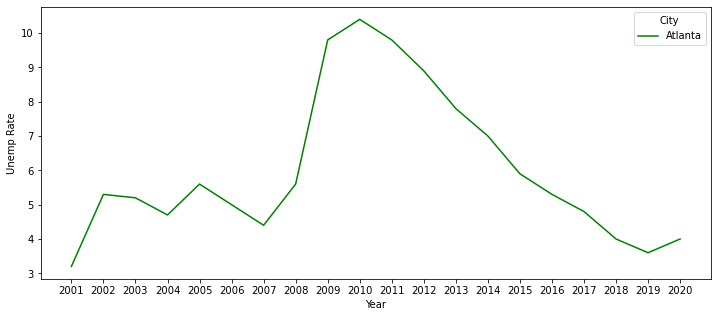

In [90]:
sns.lineplot(data=df[(df['City']=='Atlanta')], x='Year', y='Unemp Rate', hue='City', palette = ['g'])

The Above graph shows overall trend of Unemp Rate for Atlanta

<AxesSubplot:xlabel='Year', ylabel='Pop Change Rate'>

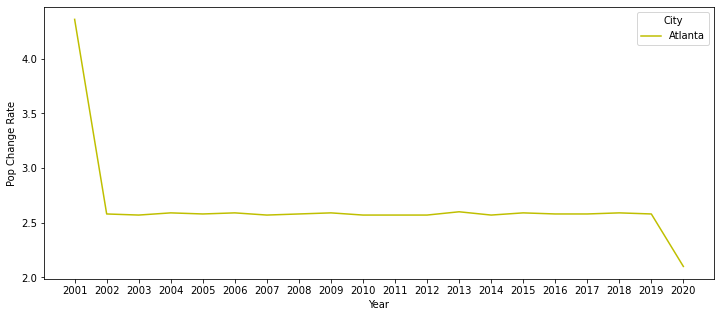

In [91]:
sns.lineplot(data=df[(df['City']=='Atlanta')], x='Year', y='Pop Change Rate', hue='City', palette = ['y'])

When we look at the trends only for Atlanta we do see that there are some overlapping trend for GDP, however, we do not see similar trends for Unemployment Rate and the Population Change rate.

So we are going to have a new data frame based on the average performance through out the years and going to pick top 5 and examine the relationship between the economic data

### Looking at Linear relationship using the whole Data
Before we do that, we are going to work with the whole data frame just to see if we can find relationships using the whole data frame. So that we might have a sense of which economic data is related to the performance of the teams

<AxesSubplot:xlabel='Winrate', ylabel='Unemp Rate'>

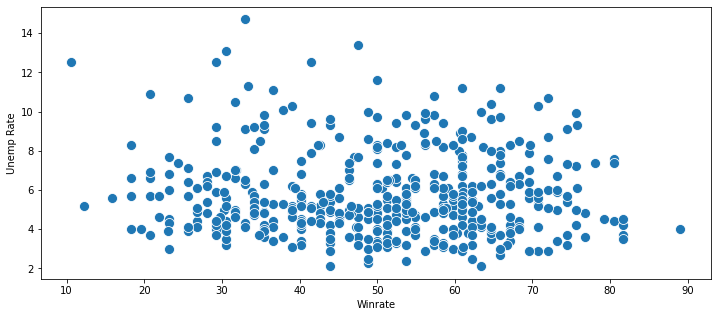

In [92]:
sns.scatterplot(data=df, x='Winrate', y='Unemp Rate', s=100)

<AxesSubplot:xlabel='Winrate', ylabel='GDP'>

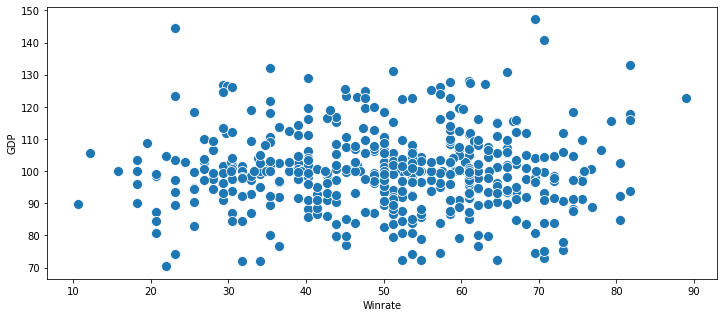

In [93]:
sns.scatterplot(data=df, x='Winrate', y='GDP', s=100)

<AxesSubplot:xlabel='Winrate', ylabel='Pop Change Rate'>

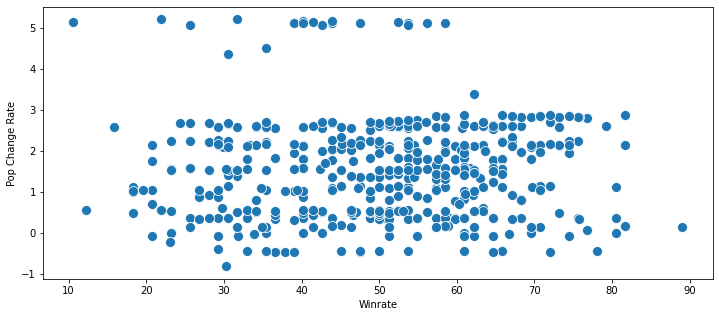

In [94]:
sns.scatterplot(data=df, x='Winrate', y='Pop Change Rate', s=100)

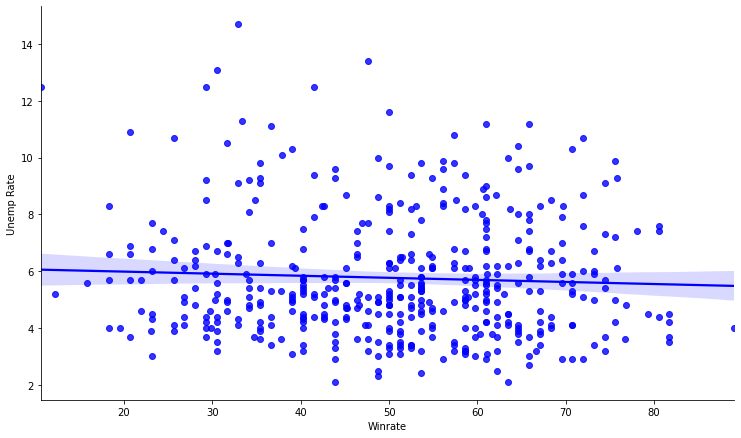

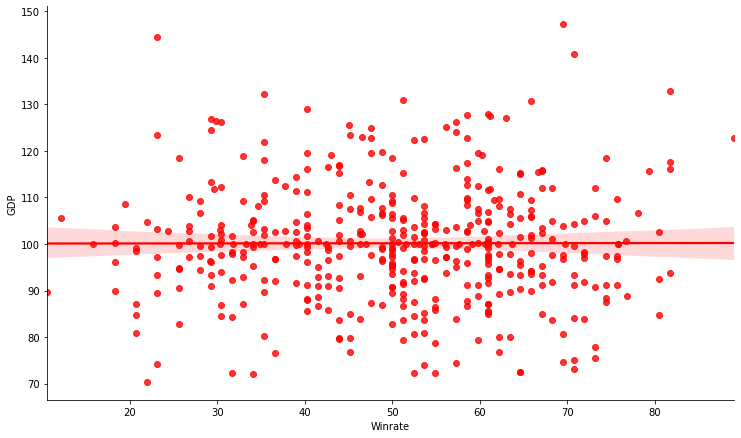

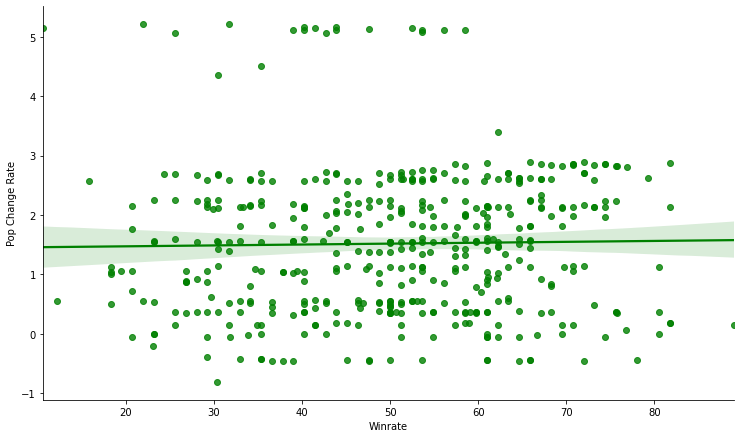

In [95]:
sns.lmplot(x='Winrate', y='Unemp Rate', data=df, fit_reg=True, height=6,aspect=1.7, line_kws={'color':'blue'}, scatter_kws={'color':'blue'});
sns.lmplot(x='Winrate', y='GDP', data=df, fit_reg=True, height=6,aspect=1.7, line_kws={'color':'red'}, scatter_kws={'color':'red'})
sns.lmplot(x='Winrate', y='Pop Change Rate', data=df, fit_reg=True, height=6,aspect=1.7, line_kws={'color':'green'}, scatter_kws={'color':'green'})

From using the whole data frame we do see a little negative relationship between the Win Rate of teams and Unemployment Rate. However, we do not see any relationship between the GDP and Pop Change Rate. To have it more detailed we are going to run a linear regression model to check carefully.

### Linear Regression Model using whole data sets

In [96]:
df = df.rename({'Unemp Rate': 'UnempRate', 'Pop Change Rate': 'PopChangeRate'}, axis=1)

Here is the Linear regression model for Unemployment Rate and the Winrate

In [97]:
mod = smf.ols(formula='UnempRate ~ Winrate', data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              UnempRate   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.216
Date:                Tue, 22 Nov 2022   Prob (F-statistic):              0.271
Time:                        02:22:20   Log-Likelihood:                -993.75
No. Observations:                 457   AIC:                             1991.
Df Residuals:                     455   BIC:                             2000.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.1320      0.348     17.631      0.0

We do see some negative relationship between the Win Rate and it's Unemployment Rate. However, the p-value indicates that there is not a significance

In [98]:
mod = smf.ols(formula='GDP ~ Winrate', data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    GDP   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                  0.001293
Date:                Tue, 22 Nov 2022   Prob (F-statistic):              0.971
Time:                        02:22:20   Log-Likelihood:                -1801.7
No. Observations:                 457   AIC:                             3607.
Df Residuals:                     455   BIC:                             3616.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    100.0860      2.038     49.118      0.0

Also, for both GDP and Population Change Rate, looking at the p-value and coefficient, there is no relationship using the whole data frame.

In [99]:
mod = smf.ols(formula='PopChangeRate ~ Winrate', data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          PopChangeRate   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.1654
Date:                Tue, 22 Nov 2022   Prob (F-statistic):              0.684
Time:                        02:22:21   Log-Likelihood:                -730.45
No. Observations:                 457   AIC:                             1465.
Df Residuals:                     455   BIC:                             1473.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4422      0.195      7.378      0.0

### Making new data frame based on their average performance from 2001~2019

First we are going to caculate each team's average rank over the years from 2001 to 2019 and store them into a new data frame for our reference.

In [100]:
team_ranking_dict = {}
team_counter_dict = {}
for i, row in df.iterrows():
  team_name = row["City"]
  if team_name in team_ranking_dict:
    team_ranking_dict[team_name] = team_ranking_dict[team_name] + row["Rk"]
    team_counter_dict[team_name] = team_counter_dict[team_name] + 1
  else:
    team_ranking_dict[team_name] = row["Rk"]
    team_counter_dict[team_name] = 0

for i in team_ranking_dict.keys():
  team_ranking_dict[i] = team_ranking_dict[i] / team_counter_dict[i]

team_ranking_df = pd.DataFrame.from_dict(team_ranking_dict, orient='index')
team_ranking_df = team_ranking_df.reset_index()
team_ranking_df.columns = ['City', 'Average Ranking']
team_ranking_df.sort_values(by = 'Average Ranking',ascending=True).reset_index(drop=True)

,City,Average Ranking
0,SanAntonio,5.473684
1,Dallas,10.526316
2,Houston,11.315789
3,Boston,12.736842
4,Miami,12.947368
5,Indiana,13.473684
6,Denver,14.157895
7,Utah,14.315789
8,Portland,14.684211
9,Detroit,15.736842


From the above Data Frame, we see that San Antonio, Dallas, Houston, Boston, Miami, Indiana are top 5 and Atlanta, Charlotte, Sacramento, Washington, and Minnesota is the bottom 5. For our comparison we are going to include mediocre performed team which ranked 7~14 in average ranking. 

Note that these are based on the average performance throuhg out years from 2001~2019

Based on the data frame provided above, we are going to divide our original data frame into top five performed team, middle seven performed team and bottom performed team.

In [101]:
team_ranking_df = team_ranking_df.sort_values(by=["Average Ranking"])

top5_ranking_df = team_ranking_df.iloc[:5]
bot5_ranking_df = team_ranking_df.iloc[-5:]
mid_ranking_df = team_ranking_df.iloc[5:-5]

top5_df = pd.DataFrame()
bot5_df = pd.DataFrame()
mid_df = pd.DataFrame()

for i in top5_ranking_df["City"]:
    top5_df = top5_df.append(df[df["City"] == i])
    
for i in bot5_ranking_df["City"]:
    bot5_df = bot5_df.append(df[df["City"] == i])
    
for i in mid_ranking_df["City"]:
    mid_df = mid_df.append(df[df["City"] == i])
  
top5_df = top5_df.reset_index()
bot5_df = bot5_df.reset_index()
mid_df = mid_df.reset_index()

In [102]:
# to check if we have the teams we want
print(top5_df['Team'].unique())
print(top5_df.shape)

['SanAntonio Spurs' 'Dallas Mavericks' 'Houston Rockets' 'Boston Celtics'
 'Miami Heat']
(100, 11)


Now that we have data frame in our favor, we can start modeling linear relationships to examine if the performace do have impacts on economy

### Looking at linear relationships for top data

- we will first observe the trend of Ranks of top five, mid seven, and bottom five teams
- Then we are going to see how the each points are scatterd out to have a sense whether it will bring in some relationship
- Then we are going to plot a line to visually see the slop of the line
- Then we are goint to run linear regression model to see if we can statisitcally accept the null hypothesis or not

<AxesSubplot:xlabel='Year', ylabel='Winrate'>

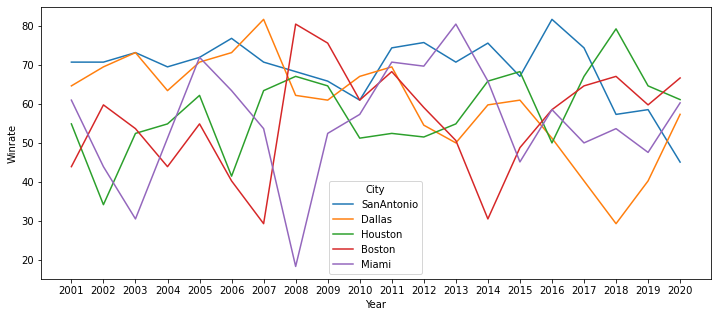

In [103]:
sns.lineplot(data=top5_df, x='Year', y='Winrate', hue='City')

As we expected, there are a lot of ups and downs to the trend because its hard to maintain and keep the performance over the years

Now that we looked at the trend of the top five teams we will explore the relationship with economic factors using catter plots.

<AxesSubplot:xlabel='Winrate', ylabel='UnempRate'>

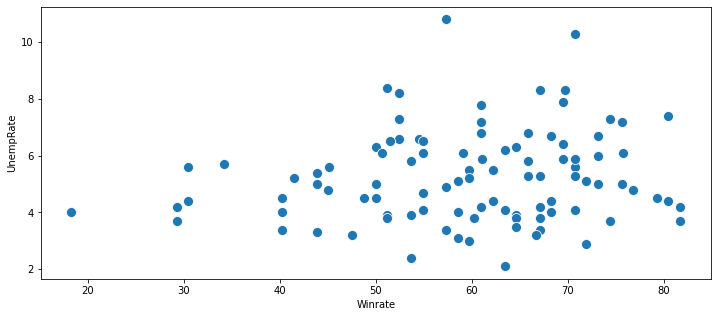

In [118]:
sns.scatterplot(data=top5_df, x='Winrate', y='UnempRate', s=100)

We see here the relationship between teh Unemployment Rate and the Win rate of top 5 teams, but it is hard to visualize the line since it seems like teh scatter is all around the place

<AxesSubplot:xlabel='Winrate', ylabel='GDP'>

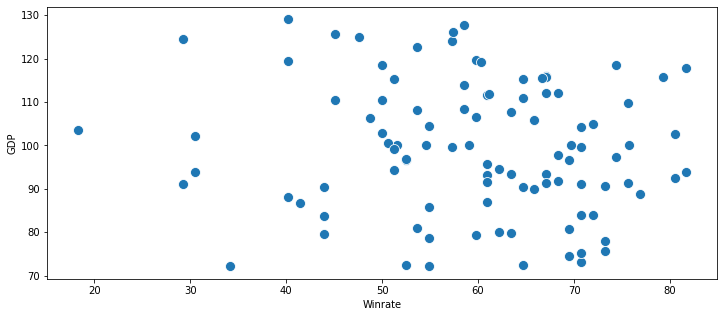

In [119]:
sns.scatterplot(data=top5_df, x='Winrate', y='GDP', s=100)

For GDP and Win Rate relationship, its hard to visualize too.

<AxesSubplot:xlabel='Winrate', ylabel='PopChangeRate'>

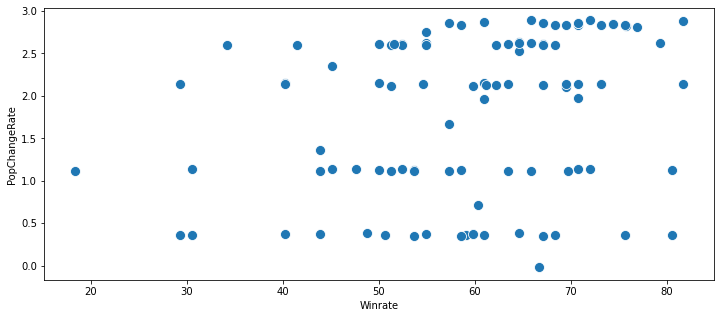

In [106]:
sns.scatterplot(data=top5_df, x='Winrate', y='PopChangeRate', s=100)

Population Change rate and Winrate relationship is even more harder to visualize!

So we are going to draw some line over the scatter plot to see if it will help us

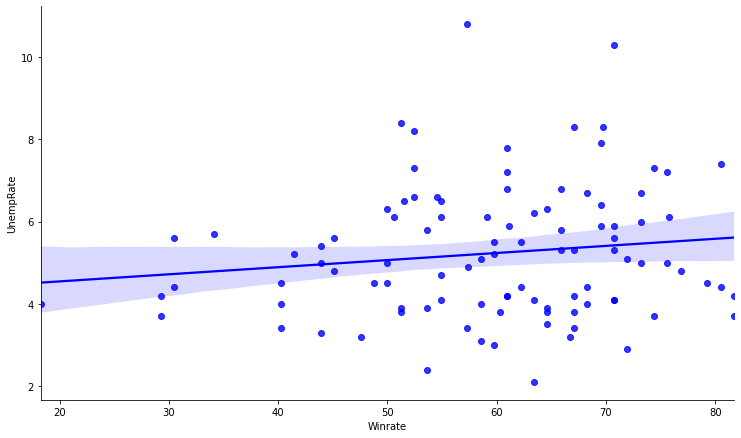

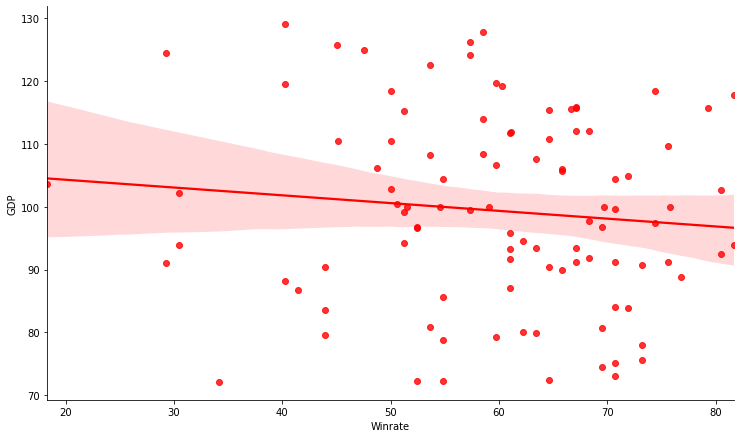

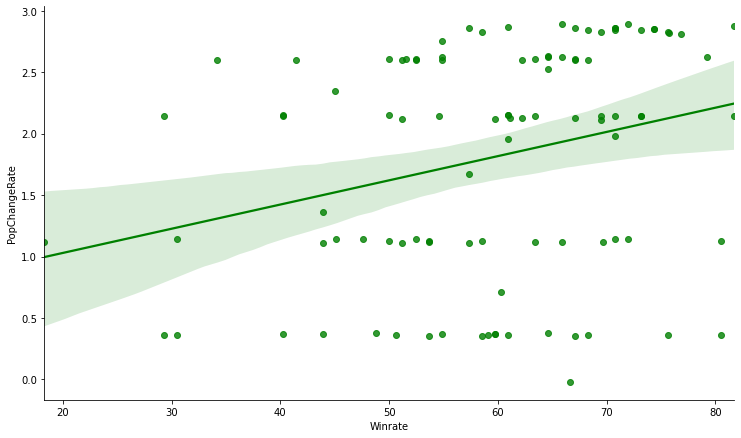

In [107]:
sns.lmplot(x='Winrate', y='UnempRate', data=top5_df, fit_reg=True, height=6,aspect=1.7, line_kws={'color':'blue'}, scatter_kws={'color':'blue'});
sns.lmplot(x='Winrate', y='GDP', data=top5_df, fit_reg=True, height=6,aspect=1.7, line_kws={'color':'red'}, scatter_kws={'color':'red'})
sns.lmplot(x='Winrate', y='PopChangeRate', data=top5_df, fit_reg=True, height=6,aspect=1.7, line_kws={'color':'green'}, scatter_kws={'color':'green'})

From above line plots we do see some relationships. Unemployment rate increase when Winrate increas, GDP decrease when Winrate increase, and Population change rate increase whne Winrate increas. The Unemployment rate and GDP is unexpected since we thought that Unemployment and GDP will be improved when the performance of NBA team gets better. On the other hand, the Population change rate is expected as performance gets better, there will be more people moving in to that city

### Linear regression model using the top data
Now we are going to run linear regression model to see if these lines are significan or not

In [142]:
mod = smf.ols(formula='UnempRate ~ Winrate', data=top5_df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              UnempRate   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     1.900
Date:                Tue, 22 Nov 2022   Prob (F-statistic):              0.171
Time:                        05:51:13   Log-Likelihood:                -188.15
No. Observations:                 100   AIC:                             380.3
Df Residuals:                      98   BIC:                             385.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.1997      0.764      5.493      0.0

Above analysis show that the p-value is larger than 0.01 or 0.05 and has a positive coefficient which we did not expect. Here we can conclude that the Win Rate of top five teams and it's citys Unemployment does not have relationship.

In [128]:
mod = smf.ols(formula='GDP ~ Winrate', data=top5_df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    GDP   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.119
Date:                Tue, 22 Nov 2022   Prob (F-statistic):              0.293
Time:                        05:23:22   Log-Likelihood:                -411.58
No. Observations:                 100   AIC:                             827.2
Df Residuals:                      98   BIC:                             832.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    106.7771      7.140     14.954      0.0

Above analysis for GDP and Win Rate relationship show that the p-value is larger than 0.01 or 0.05 and has a negative coefficient which we also did not expect. Here we can conclude that the Win Rate of top five teams and it's city's GDP  does not have relationship.

In [129]:
mod = smf.ols(formula='PopChangeRate ~ Winrate', data=top5_df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          PopChangeRate   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     7.857
Date:                Tue, 22 Nov 2022   Prob (F-statistic):            0.00610
Time:                        05:23:29   Log-Likelihood:                -130.27
No. Observations:                 100   AIC:                             264.5
Df Residuals:                      98   BIC:                             269.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6354      0.429      1.483      0.1

Here we see some significance  based on the p-value. and has postivie coefficient which tells us that when Winrate increase, the population change rate also increases. Thus, there is a significance between the win rate and the population change rate for the top five teams.

### Looking at linear relationship using the middle data
 - First, we are going to look at the trends of win rate for middle seven teams
 - Then we will work with data from the middle-pack of our data - consisting of historically mediocre teams - to see if we can find any relationships. This will help us understand which economic data is related to mediocre team performances.

<AxesSubplot:xlabel='Year', ylabel='Winrate'>

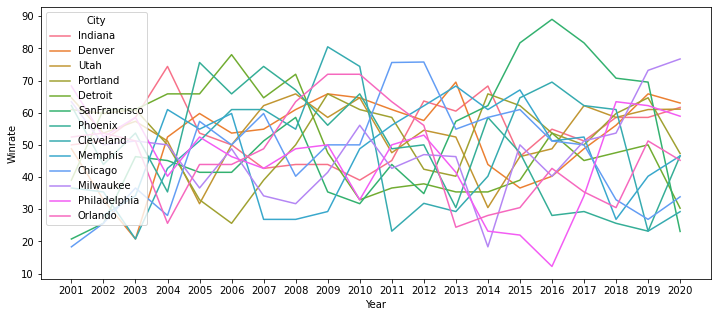

In [120]:
sns.lineplot(data=mid_df, x='Year', y='Winrate', hue='City')

As we expected again, the win rate of each team are not consistant due to nature of sport however, we will still see whether there ie linear relationships with economic data with mediocre teams

<AxesSubplot:xlabel='Winrate', ylabel='UnempRate'>

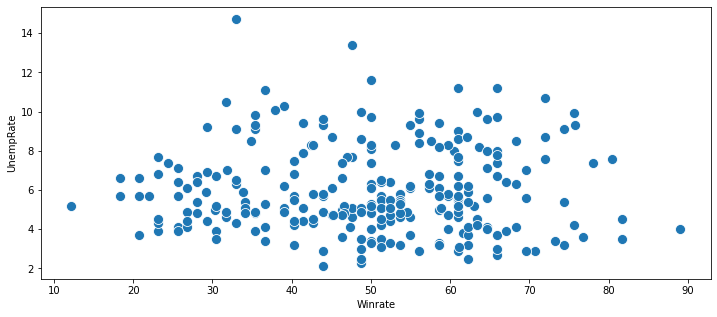

In [111]:
sns.scatterplot(data=mid_df, x='Winrate', y='UnempRate', s=100)

<AxesSubplot:xlabel='Winrate', ylabel='GDP'>

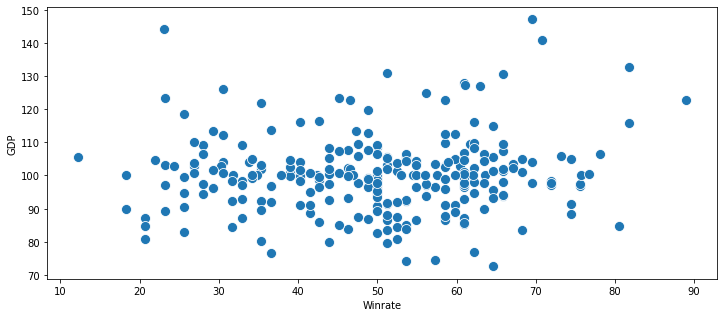

In [112]:
sns.scatterplot(data = mid_df, x='Winrate', y='GDP', s=100)

<AxesSubplot:xlabel='Winrate', ylabel='PopChangeRate'>

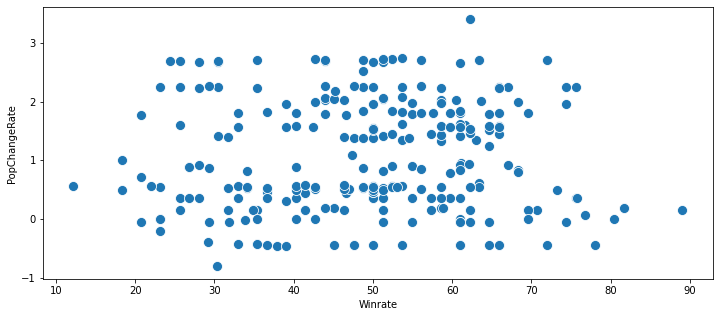

In [113]:
sns.scatterplot(data = mid_df, x='Winrate', y='PopChangeRate', s=100)

Above scatter plots does not seem to give us visualization whether it would have fitted line or not, and if we were to draw a line it would pretty much be close to horizontal line which might be no relationships at all for all three scatter plots.

To see better visualization, we will plot a linear line over the scatter plot.

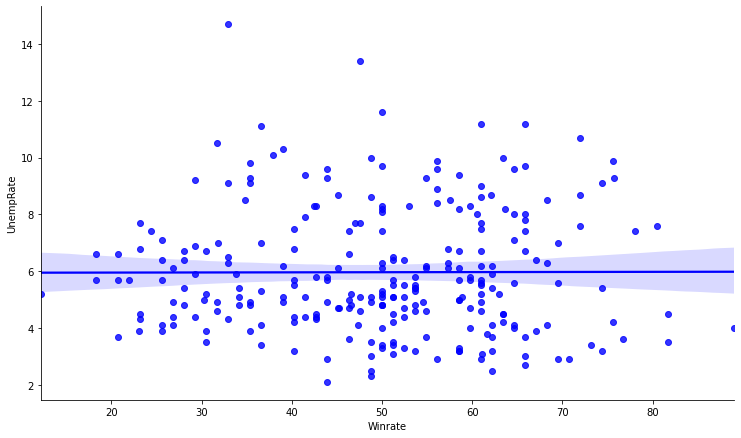

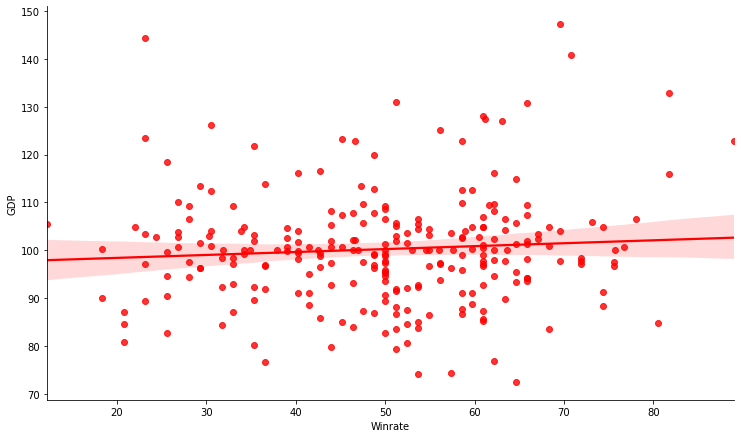

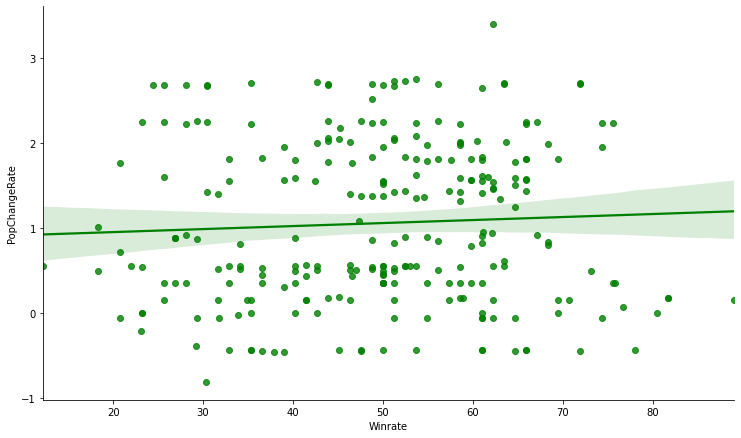

In [114]:
sns.lmplot(x='Winrate', y='UnempRate', data=mid_df, fit_reg=True, height=6,aspect=1.7, line_kws={'color':'blue'}, scatter_kws={'color':'blue'});
sns.lmplot(x='Winrate', y='GDP', data=mid_df, fit_reg=True, height=6,aspect=1.7, line_kws={'color':'red'}, scatter_kws={'color':'red'})
sns.lmplot(x='Winrate', y='PopChangeRate', data=mid_df, fit_reg=True, height=6,aspect=1.7, line_kws={'color':'green'}, scatter_kws={'color':'green'})

Using the middle dataset, we can see almost no relationship between winrate and unemployment rate, indicated by the stagnant line and tons of scattered data points. And although the relationship between GDP and winrate and population change and winrate seems to show slight, positive relationships, the relationship between GDP and winrate seems a lot stronger, as shown by the abundance of data points close to the line. Now we will run a few linear regression models to confirm these findings.

### Linear regression model using the middle-data
To start, we will run a linear regression model for unemployment and winrate

In [140]:
mod = smf.ols(formula='UnempRate ~ Winrate', data=mid_df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              UnempRate   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                  0.002137
Date:                Tue, 22 Nov 2022   Prob (F-statistic):              0.963
Time:                        05:51:02   Log-Likelihood:                -569.83
No. Observations:                 259   AIC:                             1144.
Df Residuals:                     257   BIC:                             1151.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.9434      0.484     12.287      0.0

As we saw in the graphs above, the slope of the line is very close to 0. However, all of this is irrelavant due to the large size of the p-value, indicating that this correlation is not statistically significant. Thus, there is no relationship for Unemployment Rate and Win rate for mediocre teams.

In [116]:
mod = smf.ols(formula='GDP ~ Winrate', data=mid_df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    GDP   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.540
Date:                Tue, 22 Nov 2022   Prob (F-statistic):              0.216
Time:                        02:22:28   Log-Likelihood:                -1000.8
No. Observations:                 259   AIC:                             2006.
Df Residuals:                     257   BIC:                             2013.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     97.1844      2.554     38.051      0.0

In this case, the line seems to have a definitively positive slope. However, similar to the above graph, the p value means this correlation is not significant. Thus, there is no relationship between the GDP and Win Rate for mediocre teams.

In [117]:
mod = smf.ols(formula='PopChangeRate ~ Winrate', data=mid_df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          PopChangeRate   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.7654
Date:                Tue, 22 Nov 2022   Prob (F-statistic):              0.382
Time:                        02:22:28   Log-Likelihood:                -353.61
No. Observations:                 259   AIC:                             711.2
Df Residuals:                     257   BIC:                             718.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8827      0.210      4.205      0.0

In regards to the relationship between population change rate and winrate, the line also has a slight positive slope. However, similar to the other two graphs, the sizable p value means this correlation is not significant. Thus, there is no relationship between the Population Change Rate and Win Rate for the mediocre teams.

### Looking at linear relationships for bottom data

Here we will work with data from the bottom 5 teams of our data to see if we can find any relationships. This will help us understand which economic data is related to bottom five teams performances.

<AxesSubplot:xlabel='Year', ylabel='Winrate'>

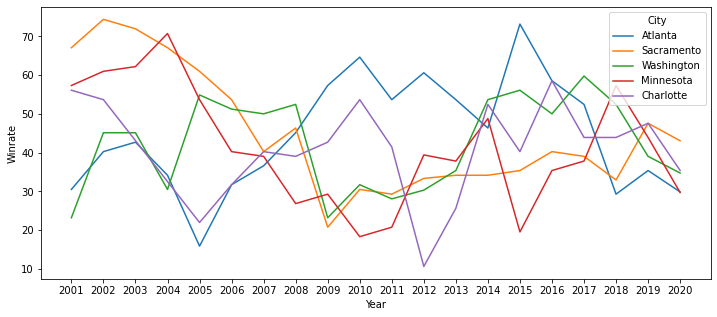

In [130]:
sns.lineplot(data=bot5_df, x='Year', y='Winrate', hue='City')

As we expected, there are a lot of ups and downs to the trend because its hard to maintain and keep the performance over the years

Now that we looked at the trend of the top five teams we will explore the relationship with economic factors using scatter plots.


<AxesSubplot:xlabel='Winrate', ylabel='UnempRate'>

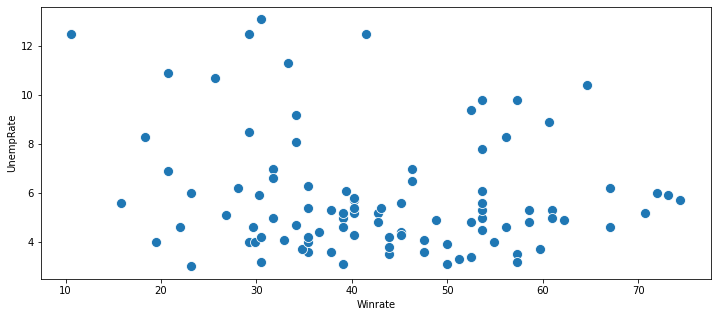

In [131]:
sns.scatterplot(data=bot5_df, x='Winrate', y='UnempRate', s=100)

We see here the relationship between the Unemployment Rate and the Win rate of bottom 5 teams. As we can see, most of the points are concentrated at the bottom, so we can see that not matter high the winrate is, the Unemployment Rate are just stay basciacally the same.

<AxesSubplot:xlabel='Winrate', ylabel='GDP'>

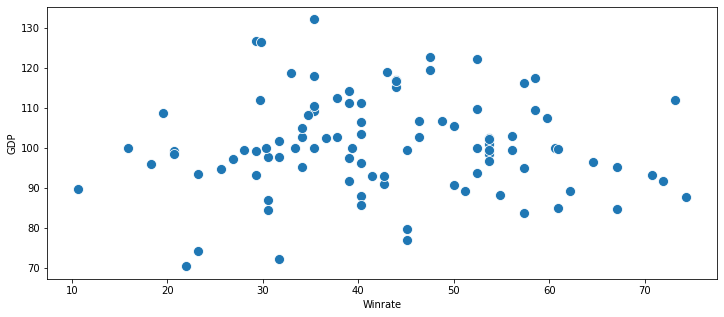

In [132]:
sns.scatterplot(data=bot5_df, x='Winrate', y='GDP', s=100)

We see here the relationship between the GDP and the Win rate of top 5 teams, we can roughly see a line in the middle. So as the winrate grows from 20-40, the GDP also grows, which is a positive correlation. However, After the winrate grow passes 40, no matter how hight the winrate is. There GDP is just stay about the same, the relationship is hard to visualize.

<AxesSubplot:xlabel='Winrate', ylabel='PopChangeRate'>

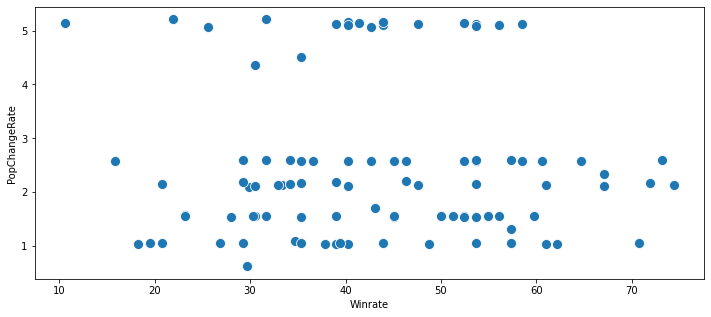

In [133]:
sns.scatterplot(data=bot5_df, x='Winrate', y='PopChangeRate', s=100)

We see here the relationship between the Population Change Rate and the Win rate of bottom 5 teams, but it is hard to visualize the line since it seems like teh scatter is all around the place.

For better visualization, we will draw linear lines for each scatter plot we generated above, this will give us better picture of whether there might be relationships between the economic data and the bottom five teams.

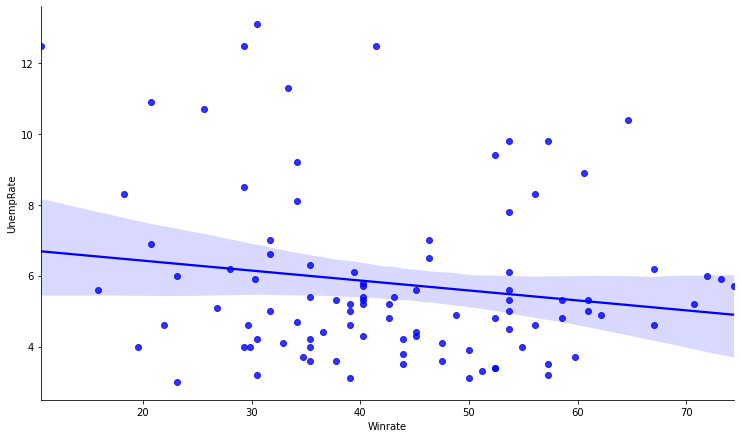

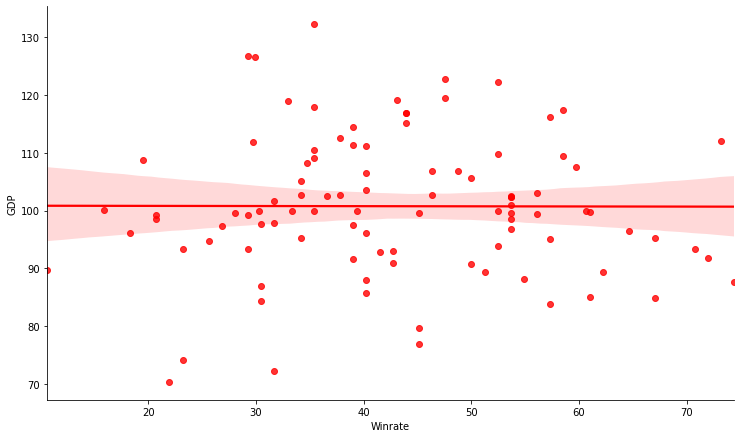

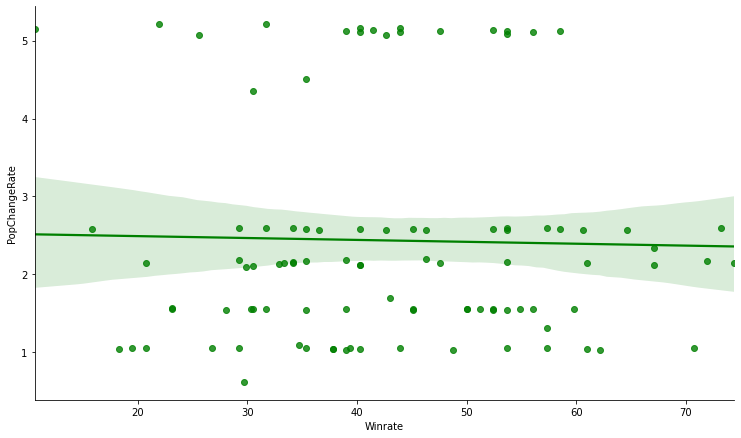

In [134]:
sns.lmplot(x='Winrate', y='UnempRate', data=bot5_df, fit_reg=True, height=6,aspect=1.7, line_kws={'color':'blue'}, scatter_kws={'color':'blue'});
sns.lmplot(x='Winrate', y='GDP', data=bot5_df, fit_reg=True, height=6,aspect=1.7, line_kws={'color':'red'}, scatter_kws={'color':'red'})
sns.lmplot(x='Winrate', y='PopChangeRate', data=bot5_df, fit_reg=True, height=6,aspect=1.7, line_kws={'color':'green'}, scatter_kws={'color':'green'})

From above line plots we do see some relationships. Unemployment rate decreases when Winrate increase, GDP stays the samewhen Winrate increase, and Population change rate also basically stays the same when Winrate increas. The Unemployment rate and GDP is unexpected since we thought that Unemployment and GDP will be improved when the performance of NBA team gets better. 

### Linear regression model using the  bottom data

Now we are going to run linear regression model to see if these lines are significan or not

In [135]:
mod = smf.ols(formula='UnempRate ~ Winrate', data=bot5_df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              UnempRate   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     2.662
Date:                Tue, 22 Nov 2022   Prob (F-statistic):              0.106
Time:                        05:40:10   Log-Likelihood:                -221.79
No. Observations:                  98   AIC:                             447.6
Df Residuals:                      96   BIC:                             452.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.9866      0.776      9.000      0.0

Above analysis show that the p-value is 0.106, which is slightly larger than 0.05 and has a negative coefficient which we did not expect, Although, there is slight negative slope we cannot tell that there is significant relationship since the p-value is larger than 0.05. So there is no relationship between Unemployment Rate and Win Rate for bottom 5 teams.

In [136]:
mod = smf.ols(formula='GDP ~ Winrate', data=bot5_df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    GDP   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                 0.0007643
Date:                Tue, 22 Nov 2022   Prob (F-statistic):              0.978
Time:                        05:42:25   Log-Likelihood:                -382.51
No. Observations:                  98   AIC:                             769.0
Df Residuals:                      96   BIC:                             774.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    100.8564      4.002     25.203      0.0

Here we see our p-value to be way beyond than 0.01 or 0.05 which we can 100 percent say that there is no relationship at all between GDP and the win Rate of bottom five teams.

In [137]:
mod = smf.ols(formula='PopChangeRate ~ Winrate', data=bot5_df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          PopChangeRate   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                   0.05603
Date:                Tue, 22 Nov 2022   Prob (F-statistic):              0.813
Time:                        05:43:27   Log-Likelihood:                -171.46
No. Observations:                  98   AIC:                             346.9
Df Residuals:                      96   BIC:                             352.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5400      0.465      5.468      0.0

Similarly as GDP and Win rate relationships, there is no significant relationship for Population change rate and win rate.

### Overall Results

Most of our results indicated that there are no relationship between the economic variables and the NBA teams performance. This might be because of other variables out in the world that might also be affecting the economy. NBA market is just a small size of economic factor when we scope the economy as a whole country. Although we did not take those other variables into account while observing statistical models since we were limited with our data, we still were able to observe the relationship between the population change rate and win rate of top five teams. We observed that when Win rate increase, we saw population change also increase with acceptable p-value. 


# Ethics & Privacy

The statistics such as GDP and population rate change were publicly available on the BEA government database, and we believe these statistics to be facts rather than something that should be agreed upon. In our project, we made sure to generalize a particular population such as the cities. If a city disagrees or refutes its analysis for any reason, then they would have to accept that the data we have collected are facts rather than opinions, and therefore should be available for anyone to use. We also made sure to scrape the project of only its salient metrics (GDP, Population change rate, Winrate, etc.). This was done mainly so we would not have to mention the name of particular economic industries or call attention to any individuals. With this information in mind, there are very few windows for privacy concerns.

However, our biggest ethical concern comes in the fact that our data is pulled from multiple sources where we have no context as to how they’re being calculated. For example, although GDP is a very direct and objective measurement of economic growth, it is extremely difficult to determine if anything is or isn’t biasing something. On top of this, by cleaning and manipulating the data to fit our hypothesis it is very possible that the nuances of each metric become more and more hard to see clearly. By the nature of our hypothesis targeting cities to their respective NBA team, the best we can do is acknowledge that these generalizations will lead to data that may be somewhat skewed. 


# Conclusion & Discussion

In summary, we looked at how an NBA team’s win rate can have an impact on economic growth. Specifically we looked at the unemployment rate, GDP, and population rate change to measure economic growth and win rate to find a correlation between them, for their respective cities (23 cities). To do this we first cleaned and combined the datasets, making it so that we had the team’s respective city and the economic measures we used for the city so that we can line up the information by year. We then utilized line plots to visualize the trends of GDP, unemployment rate, and population rate change over the years (2001~2020). We used distribution plots to visualize the spread of the data for winrate, GDP, unemployment rate, and population rate change, to be cautious when analyzing our data. 

When looking over the linear relationship of the whole data between unemployment rate, GDP, and population rate change with win rate. We found a negative relationship between the Win Rate and Unemployment Rate, but no significance based on the p-value. Looking at the p-value and coefficient, there was no relationship using the whole data frame for GDP, unemployment Rate, and population rate change. From this we went on to use the NBA team’s average ranking from 2001~2019 to group our teams into three groups [top 5, middle, and bottom 5] to do our linear regression analysis. For each group we found no significant relationship between win rate and GDP nor win rate and unemployment rate. For the bottom 5 and the middle group we found no significant relationship between win rate and population change rate. For the top 5 we found a significant relationship between win rate and population change rate. Overall, most of our results indicated that there is no relationship between the economic variables and the NBA teams performance. Yet, we observed that when the Win rate increased, we saw the population change rate also increase for the top 5 teams group.

A limitation of this project is that we looked at a total of 23 teams and their respective cities, limiting the applicability of what we observed: that when the Win rate increased, we saw population change rate also increase for the top 5 teams group. Therefore, our results might not be able to be generalized. The impact of this work on society is minimal since most of our results indicated that there are no relationship between the economic variables and the NBA teams performance. 
